Backbone to plot PETHs of PL neurons around the time of the CS for a single rat.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import sys

sys.path.append('/Users/nkinsky/Documents/UM/GitHub/TraceFC/')
sys.path.append('/Users/nkinsky/Documents/UM/GitHub/NeuroPy/')
%load_ext autoreload
%autoreload 2

from neuropy.plotting.ca_events import plot_pe_traces
from neuropy.io.minianio import MinianIO
import session_directory as sd
from neuropy.analyses.trace_fc import load_events_from_csv

Set up everything for plotting

In [84]:
def load_trace_events(sesh_dir: str, 
                      session_type: str in ['tone_recall', 'control_tone_recall', 'ctx_recall', 'ctx_habituation', 
                                            'tone_habituation', 'training'], 
                      event_type = ['CS+', 'CS-', 'shock', 'sync_tone', 'video', 'baseline']):
    """
    Loads events of a certain type from a session located in the specified session directory.
    
    """
    assert session_type in ['tone_recall', 'control_tone_recall', 'ctx_recall', 'ctx_habituation', 'tone_habituation', 'training']
    assert event_type in ['CS+', 'CS-', 'shock', 'sync_tone', 'video', 'baseline']
    sesh_dir = Path(sesh_dir)
    
    session_type = 'habituation' if session_type == 'ctx_habituation' else session_type
    # Assemble csv file info into a dataframe.
    csv_files = sorted(sesh_dir.glob('**/' + session_type + '*.csv'))
    event_df_list = []
    for csv_file in csv_files:
        event_df_list.append(load_events_from_csv(csv_file))
    event_df = pd.concat(event_df_list, ignore_index=True)
    
    # Now parse events
    event_str = 'blah'
    if event_type == 'CS+':
        event_str = 'CS_end' if session_type == 'control_tone_recall' else 'CS'
        
    elif event_type == 'CS-':
        assert session_type == 'control_tone_recall', 'Can only specify "CS-" as event_type for "control_tone_recall" session_type'
        event_str = 'CS'
    
    else:
        event_str = event_type
        
    event_starts = event_df[event_df['Event'].str.contains(event_str) & event_df['Event'].str.contains('start')]
    event_ends = event_df[event_df['Event'].str.contains(event_str) & event_df['Event'].str.contains('end')]
    
    return event_starts, event_ends
    

In [125]:
# Specify session to plot here
animal = 'Rey'
session = 'Recall1'

# Get session directory 
sesh_dir = sd.get_session_dir(animal, session)

# Load in ca imaging data from minian
minian = MinianIO(basedir=sesh_dir)

# Load in event data
event_starts, event_ends = load_trace_events(str(sesh_dir), 'tone_recall', 'CS+')
# event_df = load_events_from_csv(sesh_dir / '1_tone_recall' / 'tone_recall01_21_2022-12_37_59.csv')
# event_starts = event_df[event_df['Event'].str.contains('CS') & event_df['Event'].str.contains('start')]['Timestamp']
# event_ends = event_df[event_df['Event'].str.contains('CS') & event_df['Event'].str.contains('end')]['Timestamp']


Eliminating timestamps from corrupted video0 in 12_44_15 folder.
Keeping 46637 good frames found in "good_frames_bool.npy" file


Now loop through and plot things

[ 4  6  7  8 11 12 13 15 18 19 20 23 25 26 27 29 30 31 36 37]


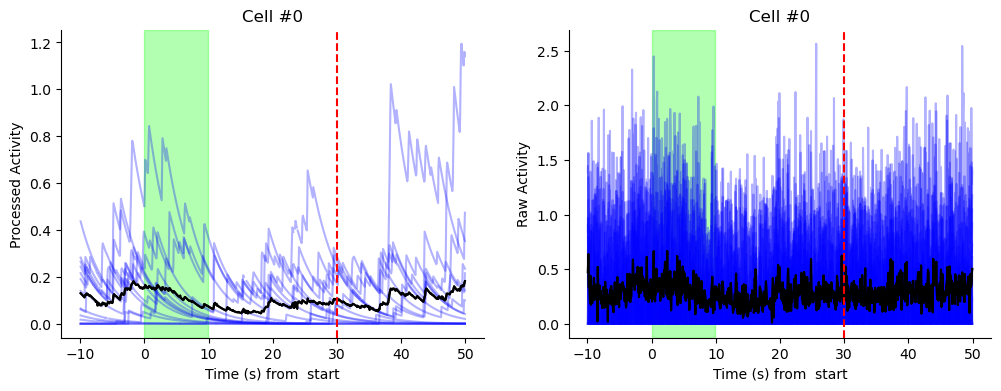

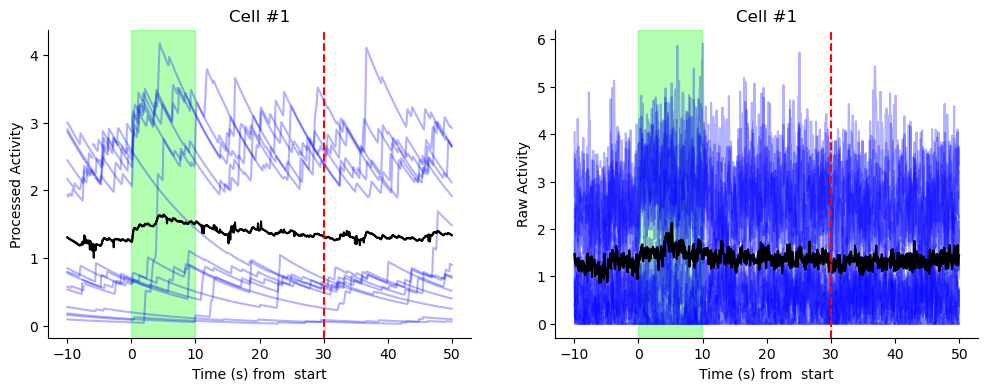

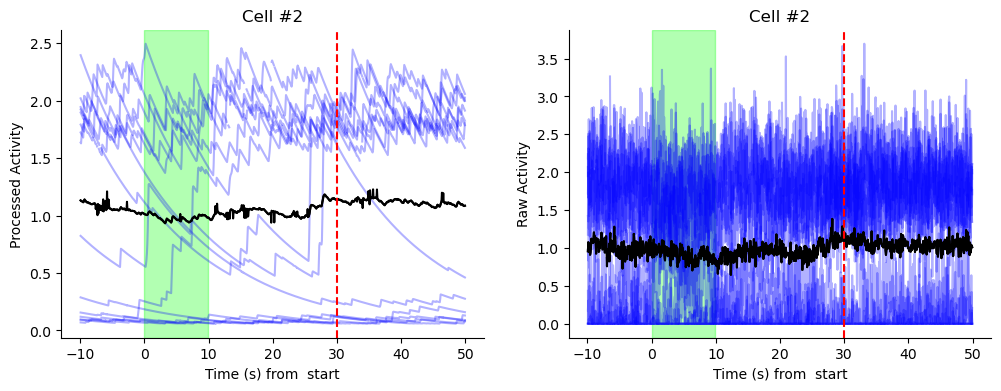

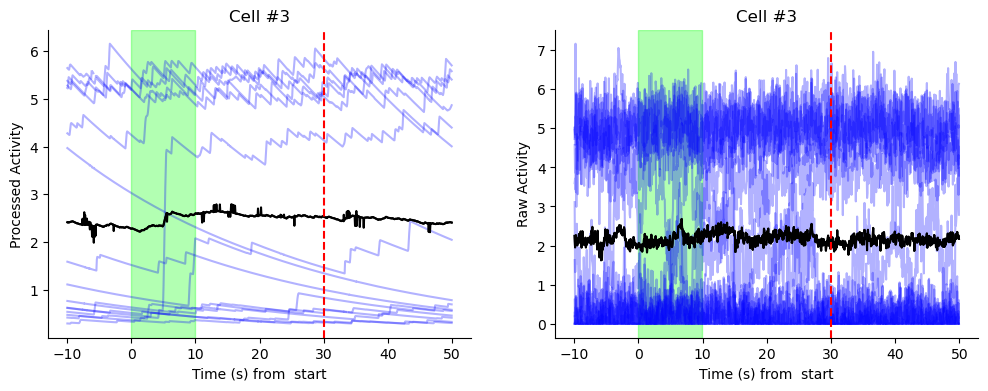

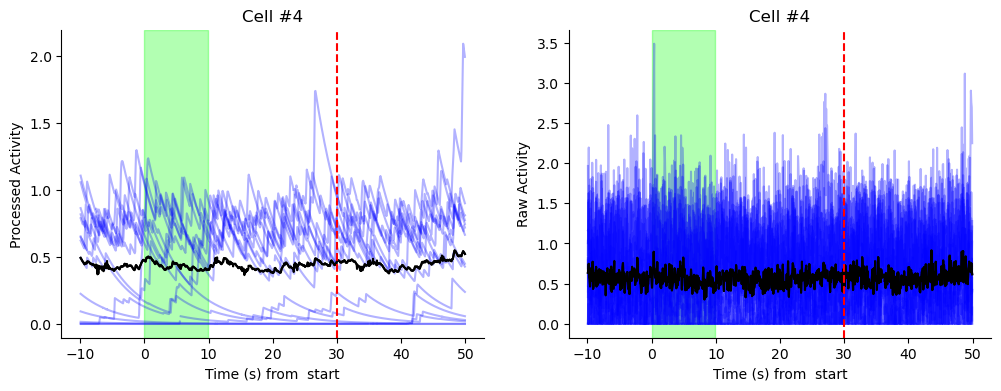

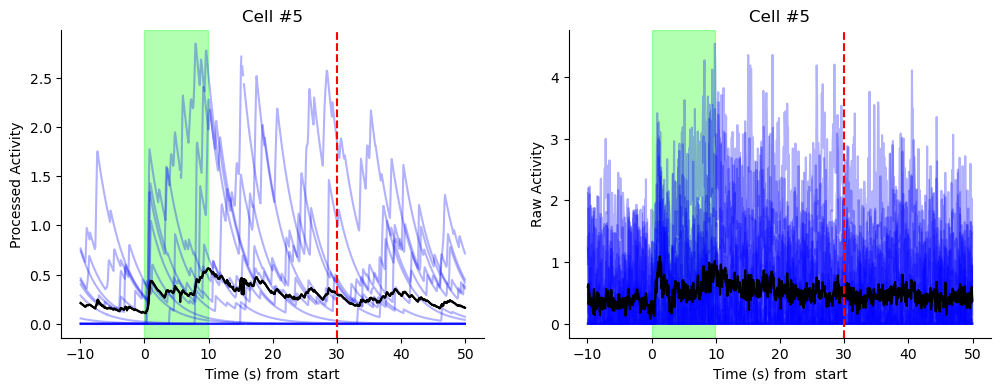

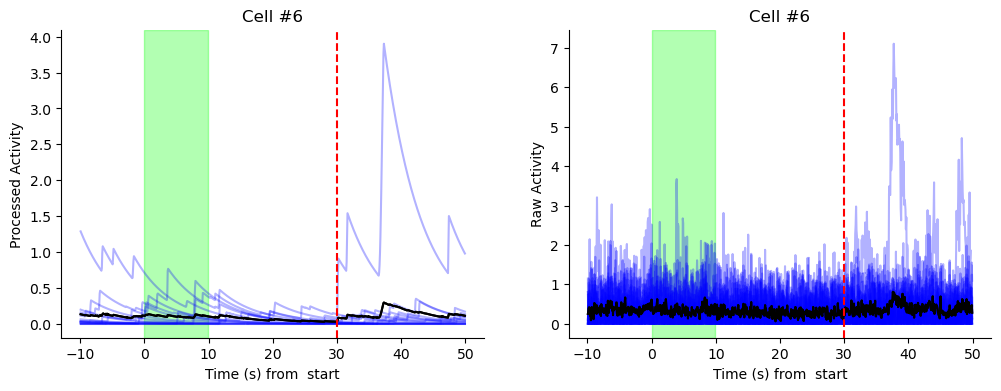

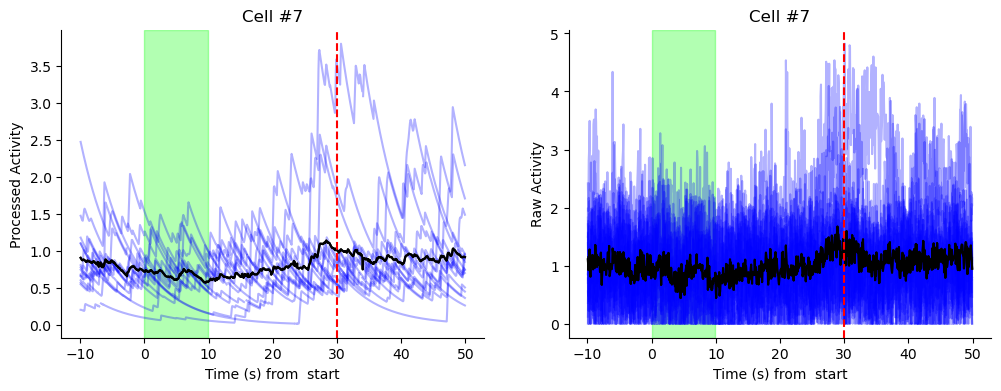

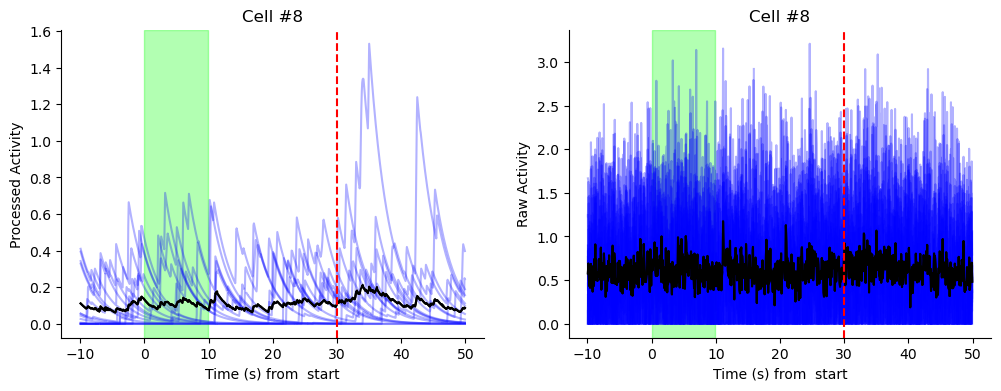

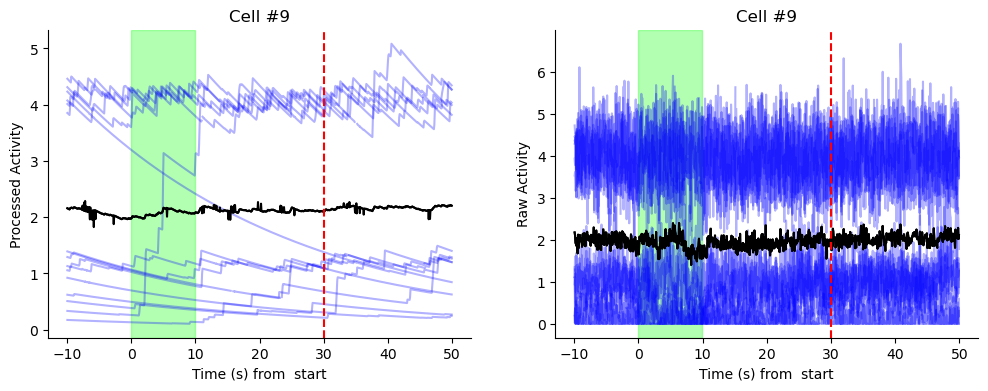

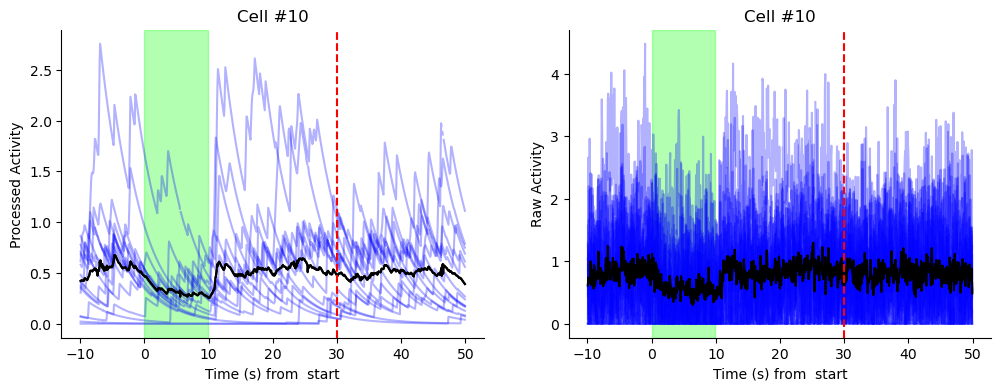

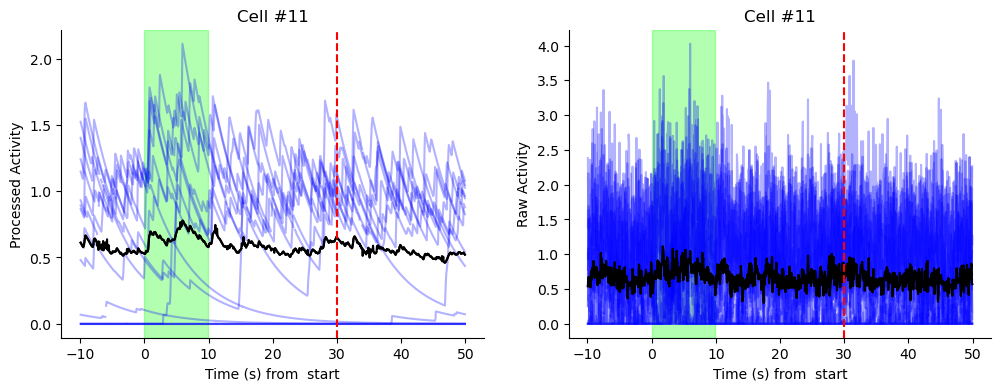

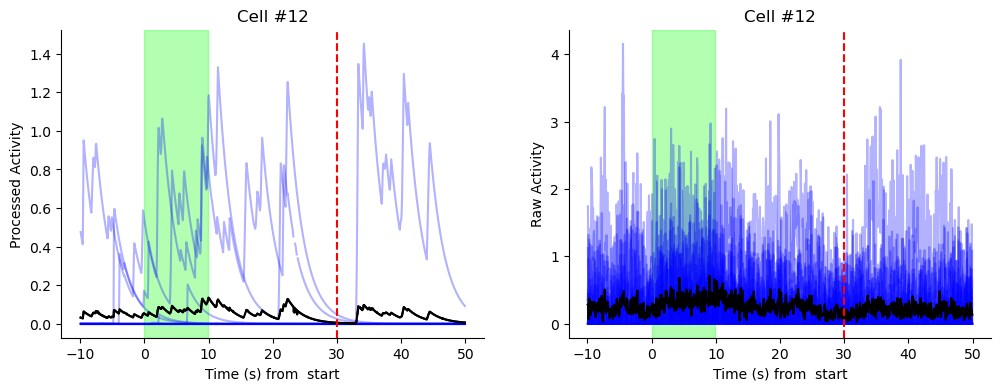

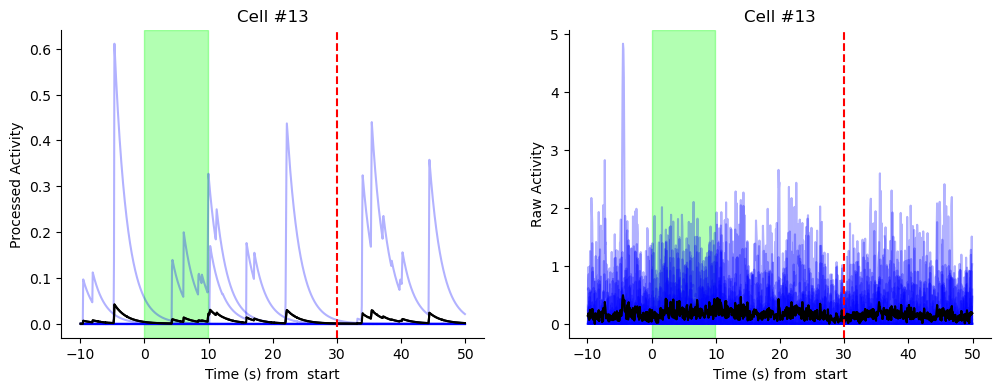

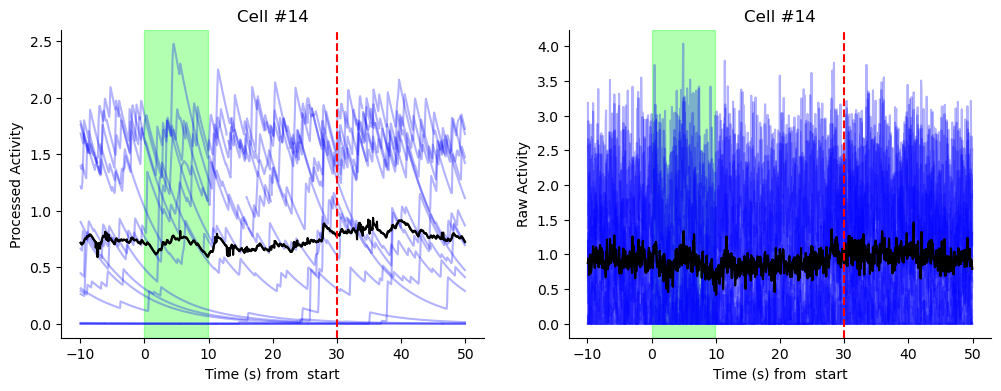

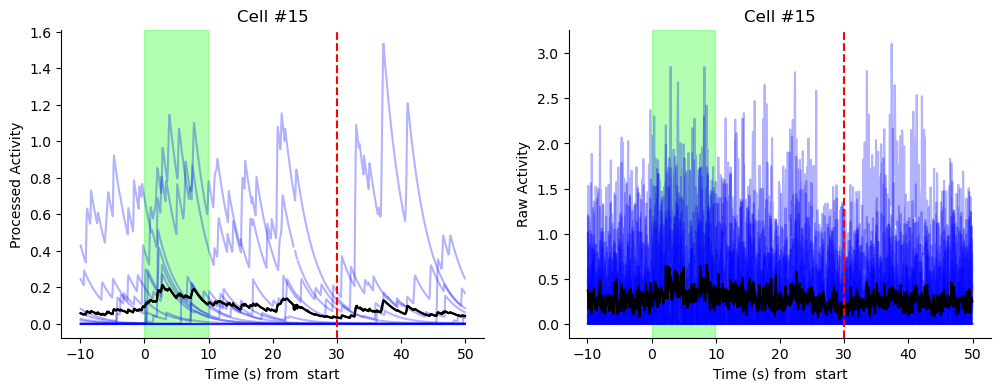

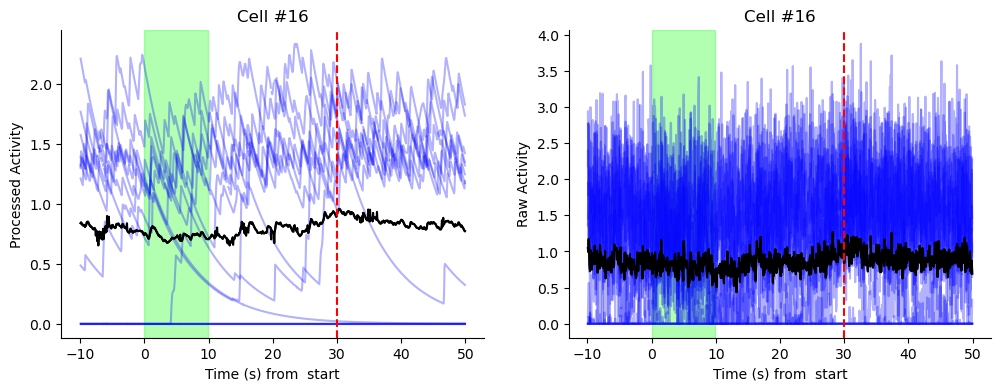

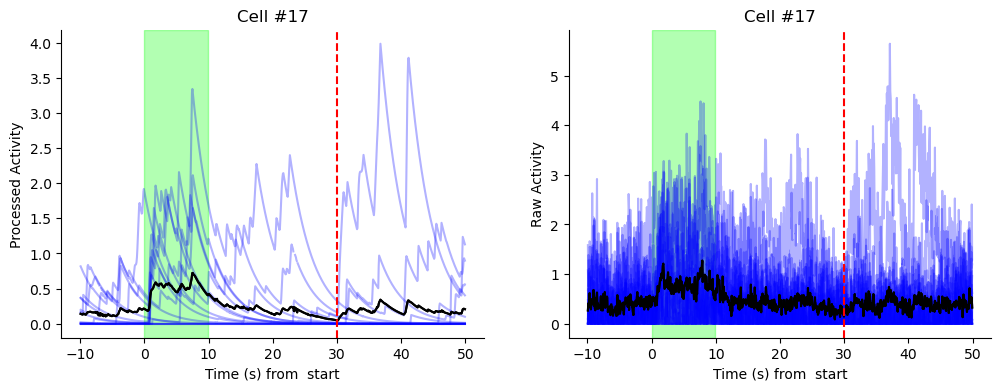

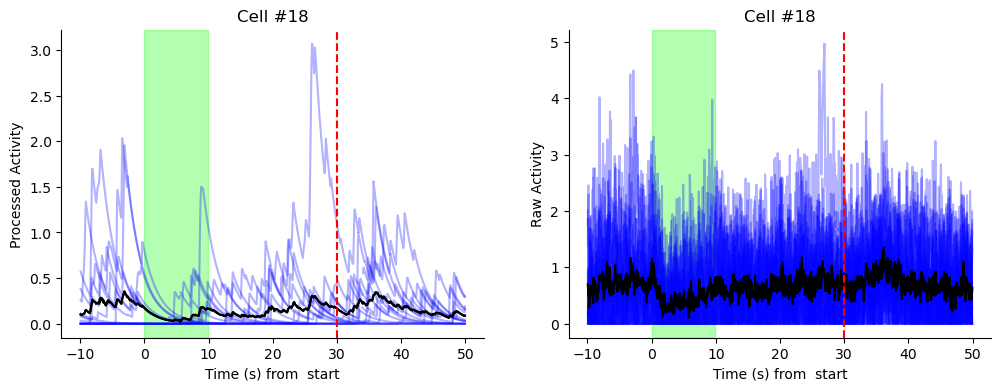

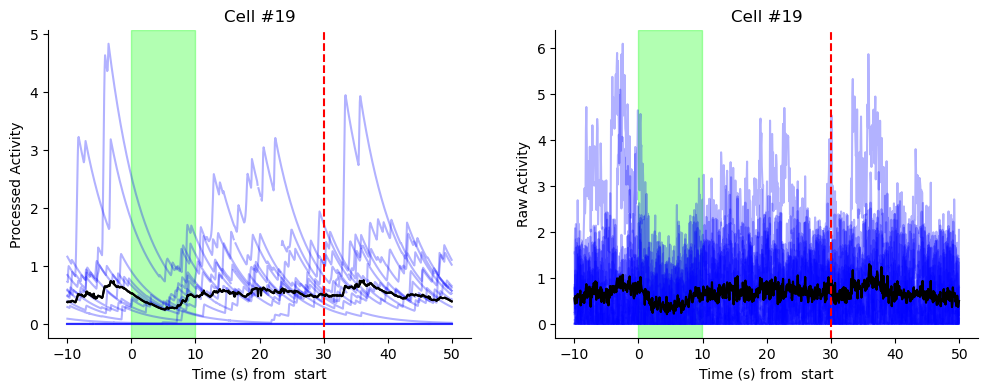

In [126]:
# Keep only good neurons
caneurons = minian.trim_neurons(keep="good")
for idc, (S, C) in enumerate(zip(caneurons.C, caneurons.YrA)):
    
    _, ax, _, _, _ = plot_pe_traces(minian.times['Timestamps'], S, event_starts['Timestamp'], 
                                    event_ends=event_ends['Timestamp'], 
                                    raw_trace=C, end_buffer_sec=40)
    [a.axvline(30, color='r', linestyle='--') for a in ax]
    [a.set_title(f'Cell #{idc}') for a in ax]
    

## NRK todo:  

1) automate loading in events file - concatenate if there are multiple, should be easy to filter out and ignore post-hoc with pandas indexing  
  
~~2) Filter out bad neurons - use "curated_neurons.pkl" file to grab only good ones~~

~~3) Debug RunTimeWarning above~~